## 1. Откроем файлы с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users.csv')

users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

В таблице users собрана информация о всех абонентах в исследуемой выборке. 
- Пропуски есть только в столбце churn_date, но согласно сопроводительной информации пропуски отмечаются в строках с действующим тарифом. Мы их не трогаем. 
- В этом же столбце, а также в столбце reg_date неверно указаны типы данных. Эти столбцы - с датой, тип данных будем менять.
- количество абонентов на тарифе smart - в 2.35 раза больше чем на тарифе ultra

In [5]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head()


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

(-10, 30)

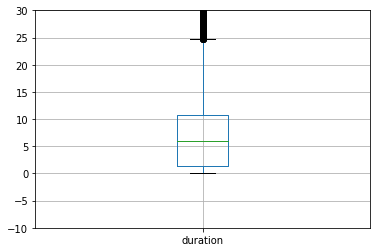

In [8]:
calls.boxplot('duration')
plt.ylim(-10, 30)

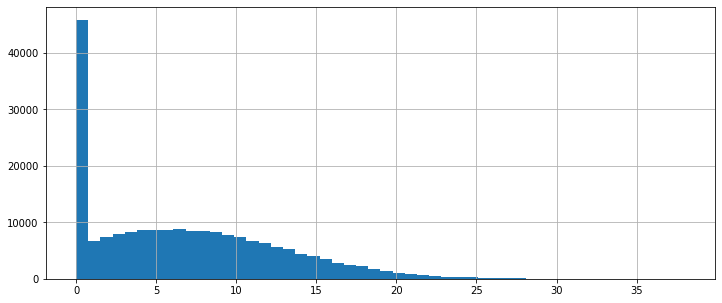

In [9]:
calls['duration'].hist(bins=50, figsize=(12, 5))

In [10]:
#Посмотрим, сколько звонков с нулевой длительностью
len(calls.query('duration==0'))

39613

В таблице calls - статистика вызовов всех абонентов. 
- Пропуски в данных отсутствуют. 
- Требуется изменить тип данных в столбце call_date.
- Много звонков с нулевой продолжительностью

In [11]:
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице message_date пропуски отсутствуют, необходимо изменить тип данных в столбце message_date

In [13]:
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


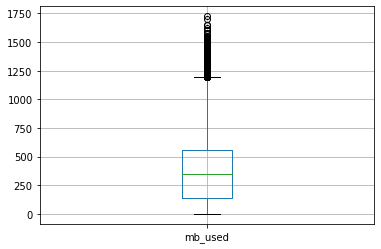

In [14]:
internet.info()
internet.boxplot('mb_used')

В таблице internet консолидирована информация о продолжительности интернет сессий
- пропуски отсутствуют, 
- необходимо изменить тип данных в столбце sesson_date
- необходимо разобраться с нулевым значением объема интернет траффика

In [15]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица описания тарифа, данные выглядят чистыми, лишь переименуем имя столбца с названием тарифа, что было идентично с таблицей users

In [17]:
tariffs.rename(columns={
    'tariff_name':'tariff' 
}, inplace=True)

In [18]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'],
      dtype='object')

### Вывод: 
- все исходные данные разбиты на пять блоков, два из которых включают общую информацию с описанием тарифных планов и абонентской базы. Три блока данных включают статистическую информацию по звонкам, интернет-сессиям и смс-сообщениям. 
- В данных с информацией об абонентах обнаружены неслучайные пропуски: часть абонентов в выборке с действующими тарифами, поэтому нет данных в строках с датой прекращения действия тарифа. 
- Во всех данных неверно представлен тип данных для дат. 
- В данных по звонкам и интернет-сессиям присутствуют нулевые значения, которых быть не должно согласно тарифным условиям оператора

## 2. Предобработка данных

### 2.1. Приведем данные к нужным типам

In [19]:
#Таблица users:

users['churn_date'] = pd.to_datetime(users['churn_date'],format='%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y.%m.%d')
users.info()
                                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [20]:
#Таблица calls
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y.%m.%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [21]:
#Таблица messages:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [22]:
#Таблица internet:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


### 2.1. Предобработка таблицы calls. 


In [23]:
#Добавим в таблицу calls месяцы когда совершались звонки
calls['month'] = calls['call_date'].dt.month

#### Разберемся с нулевыми значениями

In [24]:
#Сделаем срез по условию и посмотрим, у какого количества абонентов встречаются вызовы с нулевой
#длительностью
len(calls.query('duration == 0')['user_id'].unique())

492

In [25]:
#Посмотрим, сколько у нас вызовов продолжительностью меньше или равно 1 минуте и больше нуля
len(calls.query('0<duration<=1'))

8402

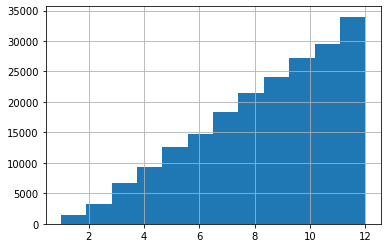

In [26]:
#Посмотрим, как распределяются вызовы по месяцам
calls['month'].hist(bins=12)

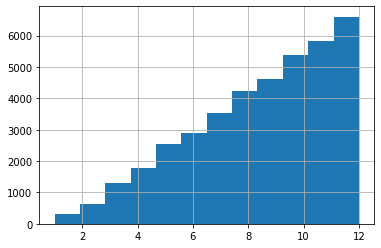

In [27]:
#Посмотрим, как распределяются нулевые значения по месяцам
calls_null = calls.query('duration == 0')
calls_null['month'].hist(bins=12)

In [28]:
#Посмотрим, как распределяются нулевые значения по тарифам
#Сначала склеим две таблицы(абонентская база и список вызовов с нулевой длительностью)
calls_null_merged=calls_null.merge(users, on='user_id', how='outer')
#сделаем срез по количеству нулевых вызовов для каждого тарифа
calls_null_users = calls_null_merged.groupby('tariff').agg({'id':'count'})
calls_null_users.sort_values(by='id', ascending=False)


,id
tariff,
smart,25669
ultra,13944


ВЫВОДЫ:
Мы видим, что у всех абонентов встречаются вызовы с нулевой длительностью. Изначально мы предположили, что так округлились вызовы менее минуты из-за сбоя в биллинговой системе оператора. Но в нашей выборке присутствуют и неокругленные вызовы менее или равные одной минуте. Таких вызовов 8402, что вписывается в общую картину выборки. Мы обнаружили еще одну особенность всех вызовов - их количество растет прямо пропорционально в течение года и достигает своего пика к декабрю. "Нулевые" вызовы вписываются в общий тренд - их количество последовательно возрастает от января к декабрю. Какой-то зависимости нулевых вызовов от тарифного плана не прослеживаем. Предполагаем, что нули - это все-таки сбой в биллинге, возможно обрыв связи после инициации соединения. В итоге мы принимаем решение сформировать баг-репорт и направить его в биллинговый отдел с просьбой дополнительно прояснить/проверить, с чем связаны вызовы нулевой длительности. В нашем анализе мы эти вызовы удаляем.

In [29]:
calls = calls.query('duration>0').reset_index()

In [30]:
len(calls.query('duration == 0'))

0

In [31]:
calls['duration'].describe()

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

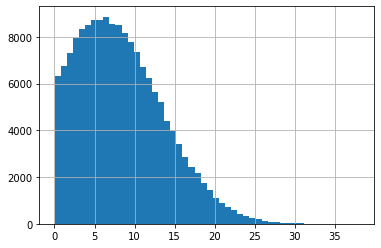

In [32]:
calls['duration'].hist(bins=50)

In [33]:
#Округлим значения длительности звонков в большую сторону
#напишем функцию для округления значений в большую сторону
def math_ceil(value):
    value = math.ceil(value)
    return value
#Запустим функцию
calls['duration'] = calls['duration'].apply(math_ceil)

### 2.2. Предобработка таблицы internet

In [34]:
#Добавим в таблицу internet месяцы, когда расходовался траффик
internet['month'] = internet['session_date'].dt.month

#### Посмотрим на нулевые значения объема передачи информации

In [35]:
#Сделаем срез по условию и посмотрим, у какого количества абонентов встречаются интернет сессии
#с нулевым объемом передаваемого траффика
len(internet.query('mb_used == 0')['user_id'].unique())

494

In [36]:
len(internet.query('mb_used == 0'))

19598

In [37]:
#Посмотрим, какой минимальный объем траффика, отличный от нуля, фиксируется биллинговой системой
internet.query('0<mb_used<=0.1')


,Unnamed: 0,id,mb_used,session_date,user_id,month
11027,11027,1038_76,0.07,2018-12-30,1038,12
11399,11399,1040_22,0.07,2018-11-23,1040,11
12506,12506,1044_143,0.08,2018-11-18,1044,11
15944,15944,1055_402,0.03,2018-06-15,1055,6
19101,19101,1065_246,0.08,2018-03-17,1065,3
27569,27569,1096_77,0.09,2018-07-09,1096,7
85722,85722,1291_278,0.04,2018-08-10,1291,8
102165,102165,1341_280,0.09,2018-08-29,1341,8
108198,108198,1370_3,0.06,2018-07-18,1370,7
124501,124501,1419_221,0.10,2018-09-09,1419,9


Видим следующую картину: минимальный объем траффика, который фиксируется биллинговой системой - 30кб. Видимо, все-таки присутствует  или проблема с биллингом или обрывается связь сразу после инициирования соединения и передачи служебной информации. Эскалируем и это наблюдение в биллинговый отдел, а от нулевых значений избавимся

In [38]:
internet = internet.query('mb_used>0').reset_index()

In [39]:
len(internet.query('mb_used == 0'))

0

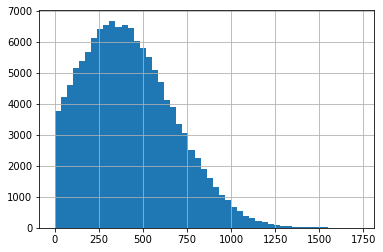

In [40]:
#Посмотрим, что получилось
internet['mb_used'].hist(bins=50)

In [41]:
# и проверим описательные характеристики описываемого параметра
internet['mb_used'].describe()

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

In [42]:
#округлим значения объема траффика в большую сторону. Сначала посмотрим что было:
internet['mb_used'].head()

0     112.95
1    1052.81
2    1197.26
3     550.27
4     302.56
Name: mb_used, dtype: float64

In [43]:
#вызовем функцию math_ceil, написанную выше и посмотрим, что стало
internet['mb_used'] = internet['mb_used'].apply(math_ceil)
internet['mb_used'].head()

0     113
1    1053
2    1198
3     551
4     303
Name: mb_used, dtype: int64

In [44]:
#Посчитаем количество звонков и количество израсходованных минут для каждого пользователя в месяц
calls_per_user = calls.groupby(['user_id', 'month']).agg({'id':'count', 'duration':'sum'})
#переименуем столбцы
calls_per_user.columns = ['calls_count', 'total_duration']
len(calls_per_user)

3168

In [45]:
#Добавим в таблицу messages месяцы, когда отправлялись сообщения
messages['month'] = messages['message_date'].dt.month

In [46]:
#Посчитаем количество отправленных сообщений каждым абонентом по месяцам
messages_per_user = messages.groupby(['user_id', 'month']).agg({'id':'count'})
#Переименуем столбцы
messages_per_user.columns = ['messages_count']
len(messages_per_user)

2717

In [47]:
#посчитаем объем израсходованного интернет-трафика по месяцам
internet_per_user = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'})
#переименуем столбцы
internet_per_user.columns = ['mb_total']
len(internet_per_user)

3201

In [48]:
#Склеим вновь созданные таблицы со статистикой по абонентам последовательно между собой
calls_internet = calls_per_user.merge(internet_per_user, on=('user_id','month'), how='outer')
calls_internet_messages = calls_internet.merge(messages_per_user, on=('user_id','month'), how='outer')
#Превратим индексы user_id и month в столбцы и посмотрим, что получилось
calls_internet_messages = calls_internet_messages.reset_index()
calls_internet_messages.head()

,user_id,month,calls_count,total_duration,mb_total,messages_count
0,1000,5,17.0,159.0,2256.0,22.0
1,1000,6,28.0,172.0,23257.0,60.0
2,1000,7,41.0,340.0,14016.0,75.0
3,1000,8,42.0,408.0,14070.0,81.0
4,1000,9,46.0,466.0,14581.0,57.0


In [49]:
#Теперь объединим получившуются общую таблицу с таблицей users
users_statistics = users.merge(calls_internet_messages, on='user_id', how='outer')
users_statistics.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,total_duration,mb_total,messages_count
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,17.0,159.0,2256.0,22.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,28.0,172.0,23257.0,60.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,41.0,340.0,14016.0,75.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,42.0,408.0,14070.0,81.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,46.0,466.0,14581.0,57.0


Посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [50]:
#Создадим словарь на базе таблицы tariff:
tariff_dict = tariffs.to_dict()
tariff_dict

{'messages_included': {0: 50, 1: 1000},
 'mb_per_month_included': {0: 15360, 1: 30720},
 'minutes_included': {0: 500, 1: 3000},
 'rub_monthly_fee': {0: 550, 1: 1950},
 'rub_per_gb': {0: 200, 1: 150},
 'rub_per_message': {0: 3, 1: 1},
 'rub_per_minute': {0: 3, 1: 1},
 'tariff': {0: 'smart', 1: 'ultra'}}

In [51]:
#Напишем функцию для расчета выручки от звонков:
def calls_revenue(row):
    total_duration = row['total_duration']
    tariff = row['tariff']
    if tariff == 'smart':
        x = total_duration-tariff_dict['minutes_included'][0]
        if x>0:
            value = x*tariff_dict['rub_per_minute'][0]
            return value
        return 0
    if tariff == 'ultra':
        x = total_duration-tariff_dict['minutes_included'][1]
        if x>0:
            value = x*tariff_dict['rub_per_minute'][1]
            return value
        return 0    

In [52]:
#Создадим столбец с дополнительным объемом выручки от звонков в итоговой таблице для анализа:
users_statistics['extra_revenue_calls'] = users_statistics.apply(calls_revenue, axis=1)


In [53]:
#Напишем функцию для расчета объема выручки от передачи сообщений
def messages_revenue(row):
    messages_count = row['messages_count']
    tariff = row['tariff']
    if tariff == 'smart':
        x = messages_count-tariff_dict['messages_included'][0]
        if x>0:
            value = x*tariff_dict['rub_per_message'][0]
            return value
        return 0
    if tariff == 'ultra':
        x = messages_count-tariff_dict['messages_included'][1]
        if x>0:
            value = x*tariff_dict['rub_per_message'][1]
            return value
        return 0

In [54]:
#Создадим столбец с дополнительным объемом выручки от сообщений в итоговой таблице для анализа:
users_statistics['extra_revenue_messages'] = users_statistics.apply(messages_revenue, axis=1)

In [55]:
#Напишем функцию для расчета дополнительного объема выручки от интернет пользователей
def internet_revenue(row):
    mb_total = row['mb_total']
    tariff = row['tariff']
    if tariff == 'smart':
        x = mb_total-tariff_dict['mb_per_month_included'][0]
        if x>0:
            value = x/1000*tariff_dict['rub_per_gb'][0]
            return value
        return 0
    if tariff == 'ultra':
        x = mb_total-tariff_dict['mb_per_month_included'][1]
        if x>0:
            value = x/1000*tariff_dict['rub_per_gb'][1]
            return value
        return 0

In [56]:
#Создадим столбец с дополнительным объемом интернет выручки в итоговой таблице для анализа:
users_statistics['extra_revenue_internet'] = users_statistics.apply(internet_revenue, axis=1)

In [57]:
def total_revenue(row):
    extra_revenue_calls = row['extra_revenue_calls']
    extra_revenue_messages = row['extra_revenue_messages']
    extra_revenue_internet = row['extra_revenue_internet']
    tariff = row['tariff']
    y = extra_revenue_calls+extra_revenue_messages+extra_revenue_internet
    if tariff == 'smart':
        value = y + tariff_dict['rub_monthly_fee'][0]
    else:
        value = y + tariff_dict['rub_monthly_fee'][1]
    return value

In [58]:
# создадим столбец в итоговой таблице с итоговой помесячной выручкой от абонентов
users_statistics['total_revenue'] = users_statistics.apply(total_revenue, axis=1)

In [59]:
users_statistics.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,total_duration,mb_total,messages_count,extra_revenue_calls,extra_revenue_messages,extra_revenue_internet,total_revenue
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,17.0,159.0,2256.0,22.0,0.0,0.0,0.0,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,28.0,172.0,23257.0,60.0,0.0,0.0,0.0,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,41.0,340.0,14016.0,75.0,0.0,0.0,0.0,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,42.0,408.0,14070.0,81.0,0.0,0.0,0.0,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,46.0,466.0,14581.0,57.0,0.0,0.0,0.0,1950.0


In [60]:
#Проверим итоговую таблицу:
users_statistics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 17 columns):
user_id                   3216 non-null int64
age                       3216 non-null int64
churn_date                189 non-null datetime64[ns]
city                      3216 non-null object
first_name                3216 non-null object
last_name                 3216 non-null object
reg_date                  3216 non-null datetime64[ns]
tariff                    3216 non-null object
month                     3214 non-null float64
calls_count               3168 non-null float64
total_duration            3168 non-null float64
mb_total                  3201 non-null float64
messages_count            2717 non-null float64
extra_revenue_calls       3216 non-null float64
extra_revenue_messages    3216 non-null float64
extra_revenue_internet    3216 non-null float64
total_revenue             3216 non-null float64
dtypes: datetime64[ns](2), float64(9), int64(2), object(4)
memory usage:

В итоговой таблице мы видим пропуски в 4 столбцах: 
- churn_date - пропуски перешли из исходной таблицы users
- mb_total, messages_count, calls_count, total_duration - пропуски в этих столбцах объясняем тем, что не все абоненты используют тариф для всех услуг. Кто-то может чем-то не пользоваться. Это нормально. С пропусками мы ничего не делаем, тип данных в этих столбцах мы не изменим на целочисленный. 
В итоговой таблице мы подкорректируем лишь типы данных в столбцах: 'extra_revenue_calls', 'extra_revenue_messages', 'extra_revenue_internet'

In [61]:
#Подкорректируем типы данных
users_statistics[['extra_revenue_calls', 'extra_revenue_messages', 'extra_revenue_internet']
                ] = users_statistics[['extra_revenue_calls', 'extra_revenue_messages', 
                                      'extra_revenue_internet']].astype('int')
users_statistics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 17 columns):
user_id                   3216 non-null int64
age                       3216 non-null int64
churn_date                189 non-null datetime64[ns]
city                      3216 non-null object
first_name                3216 non-null object
last_name                 3216 non-null object
reg_date                  3216 non-null datetime64[ns]
tariff                    3216 non-null object
month                     3214 non-null float64
calls_count               3168 non-null float64
total_duration            3168 non-null float64
mb_total                  3201 non-null float64
messages_count            2717 non-null float64
extra_revenue_calls       3216 non-null int64
extra_revenue_messages    3216 non-null int64
extra_revenue_internet    3216 non-null int64
total_revenue             3216 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(5), object(4)
memory usage: 452.2

#### Вывод:
- изменили тип данных в столбцах с датой
- удалили нулевые значения в данных со статистикой звонков и интернет-сессий. 
- Вопрос нулевой длительности звонков и нулевого объема передаваемого траффика эскалировали в биллинговый отдел для уточнения вопроса о наличии проблем.
- посчитали помесячную выручку для всех абонентов по каждой услуге и общую выручку. 

## 3. Исследовательский анализ данных

#### Опишем поведение клиентов оператора, исходя из выборки:
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. 
- Построим гистограммы. 
- Опишем распределения.

### 3.1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [62]:
#Построим сводную таблицу с требуемыми параметрами
descriptive_statistics = users_statistics.groupby('tariff').agg({'total_duration':
                                                                 ['mean', 'median', 'var', 'std'], 
                                          'mb_total':['mean', 'median', 'var', 'std'],
                                         'messages_count':['mean', 'median', 'var', 'std']}
                                        ).round()
descriptive_statistics.reset_index()

tariff total_duration                        mb_total                       \
                   mean median      var    std     mean   median         var   
0  smart          419.0  423.0  35718.0  189.0  16244.0  16533.0  34340092.0   
1  ultra          548.0  529.0  93338.0  306.0  19707.0  19428.0  98746499.0   

          messages_count                       
      std           mean median     var   std  
0  5860.0           39.0   34.0   718.0  27.0  
1  9937.0           61.0   51.0  2110.0  46.0

In [63]:
#Проверим, оплачивают ли какие-то абоненты тарифа Ультра услуги сверх лимита
users_statistics.query('tariff == "ultra" and total_revenue>1950')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,total_duration,mb_total,messages_count,extra_revenue_calls,extra_revenue_messages,extra_revenue_internet,total_revenue
159,1024,73,NaT,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,11.0,127.0,1146.0,43146.0,NaN,0,0,1863,3813.90
160,1024,73,NaT,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,12.0,108.0,949.0,35985.0,NaN,0,0,789,2739.75
311,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,7.0,26.0,209.0,35205.0,52.0,0,0,672,2622.75
383,1060,46,NaT,Калуга,Яков,Рудаков,2018-11-24,ultra,12.0,144.0,1233.0,43973.0,52.0,0,0,1987,3937.95
799,1124,54,NaT,Махачкала,Альбин,Андрианов,2018-09-24,ultra,10.0,130.0,1225.0,49789.0,121.0,0,0,2860,4810.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,1469,41,NaT,Сочи,Аксён,Абалкин,2018-07-06,ultra,11.0,88.0,795.0,35533.0,NaN,0,0,721,2671.95
3053,1474,66,NaT,Набережные Челны,Олег,Любимов,2018-11-11,ultra,12.0,132.0,1345.0,42356.0,105.0,0,0,1745,3695.40
3182,1493,71,NaT,Красноярск,Таисия,Ахматулина,2018-11-24,ultra,12.0,69.0,571.0,42776.0,78.0,0,0,1808,3758.40
3189,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,9.0,95.0,813.0,33105.0,82.0,0,0,357,2307.75


Анализ предыдущей таблицы:
- средняя длительность звонков у абонентов более дорогого тарифа ultra на 31% больше, чем у абонентов тарифа Smart
- среднее количество смс сообщений у абонентов тарифа ultra на 56% больше, чем у абонентов тарифа smart
- средний объем интернет траффика у абонентов ultra - на 17% больше, чем у абонентов тарифа smart
- Выборка абонентов с тарифом smart - более однородная по всем потребляемым услугам: дисперсия и стандартное отклонение в выборке с тарифом ultra существенно больше
- средний абонент тарифа Smart более эффективно расходует свои денежные средства, оплачивая тариф: практически полностью осваивает выделенные ему минуты и смс сообщения, но ему приходится доплачивать за интернет.
- среди абонентов обоих тарифов более востребованы услуги интернет

### 3.2. Построим гистограммы

tariff
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_duration, dtype: object

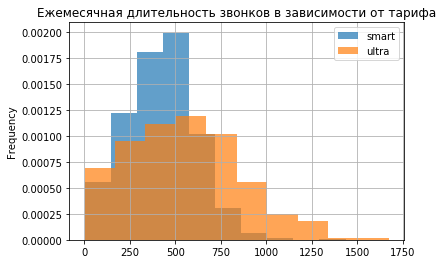

In [64]:
#Построим гистограммы частот длительности звонков в зависимости от тарифа
users_statistics.groupby(['tariff'])['total_duration'].plot(
    title='Ежемесячная длительность звонков в зависимости от тарифа', 
      kind='hist', alpha=0.7, linewidth=5, grid=True, density=True, legend=True
     )

tariff
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mb_total, dtype: object

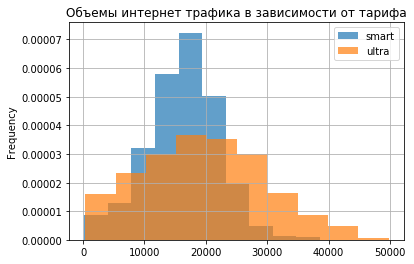

In [65]:
#Построим гистограммы частот используемых объемов траффика в зависимости от тарифа
users_statistics.groupby(['tariff'])['mb_total'].plot(
    title='Объемы интернет трафика в зависимости от тарифа', 
      kind='hist', alpha=0.7, linewidth=5, grid=True, density=True, legend=True
     )

tariff
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: messages_count, dtype: object

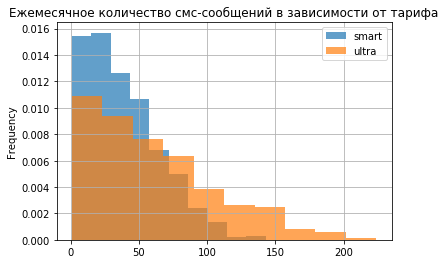

In [66]:
#Построим гистограммы частот количества смс сообщений в зависимости от тарифа
users_statistics.groupby(['tariff'])['messages_count'].plot(
    title='Ежемесячное количество смс-сообщений в зависимости от тарифа', 
      kind='hist', alpha=0.7, linewidth=5, grid=True, density=True, legend=True
     )

#### Анализ гистограмм
- Распределение звонков и интернет траффика приближается к нормальному, 
- распределение количества смс-сообщений - к распределению Пуассона. 
- Частотные гистограммы всех потребляемых услуг на тарифе smart - более узкие и высокие, что наглядно демонстрирует бОльшую однородность этой выборки.
- Гистограммы всех потребляемых услуг на тарифе utra скошены вправо, то есть на этом тарифе потребляется больший объем услуг, но существенно ниже выделенных лимитов.

## Выводы
### Все услуги на тарифе Ultra осваиваются в среднем меньше чем наполовину от предоставленных оператором лимитов. То есть абоненты фактически переплачивают за все услуги, внося абонентскую плату в размере 1950 руб. в месяц. Для оператора это с одной стороны выгодно - услуги оплачены по высокому тарифу, а с другой стороны - нет - операторские ресурсы зарезервированы, но не заполнены. С практической точки зрения, можно оптимизировать тарифный план по стоимости и лимитам и привлечь бОльшее количество абонентов. Тариф Smart осваиваится абонентами более эффективно.


## 4. Проверим гипотезы:
Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### Гипотеза 1. Средняя выручка от пользователей тарифов "Ультра" и "Смарт" различается

Нулевая гипотеза - всегда формулируется так, чтобы использовать знак равенства.
Наша нулевая гипотеза о равенстве двух генеральных совокупностей: Средняя выручка от пользователей тарифов Ультра и Смарт - одинакова. 
Альтернативная гипотеза - средняя выручка от пользователей тарифов Ультра и Смарт - различается.
Проверим гипотезу, применив метод scipy.stats.ttest_ind (array1, array2, equal_var). При этом, мы не считаем дисперсии наших выборок равными и задаем параметр equal_var=False

In [67]:
#сделаем срез искомых данных - общая выручка от абонентов тарифов Смарт и ультра
smart_revenue = users_statistics.query('tariff=="smart"')['total_revenue']
smart_revenue.head()

8     1168.4
9      550.0
10     550.0
11     998.2
12    1547.4
Name: total_revenue, dtype: float64

In [68]:
ultra_revenue = users_statistics.query('tariff=="ultra"')['total_revenue']
ultra_revenue.head()

0    1950.0
1    1950.0
2    1950.0
3    1950.0
4    1950.0
Name: total_revenue, dtype: float64

In [69]:
#Проверим гипотезу о равенстве средней выручки. Критический уровень статистической значимости 
#зададим значением 0.05.
alpha = .05
results = st.ttest_ind(
    smart_revenue, 
    ultra_revenue, equal_var=False)

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.726464936589469e-280
Отвергаем нулевую гипотезу


ВЫВОД: мы отвергаем нулевую гипотезу о равенстве средней выручки и подтверждаем альтернативную гипотезу о том что средняя выручка от пользователей тарифов Смарт и Ультра - различается

In [70]:
#Проверим расчетами:
smart_revenue.mean()

1246.0243946188343

In [71]:
ultra_revenue.mean()

2063.0679006085193

### Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза: средняя выручка от пользователей из Москвы равна средней выручке от пользователей из других регионов.
Альтернативная гипотеза: Средняя выручка от пользователей из Москвы отличается от средней выручки от пользователей из других регионов

In [72]:
##сделаем срез искомых данных - общая выручка от абонентов из Москвы и из других регионов
moscow_revenue = users_statistics.query('city in "Москва"')['total_revenue']

moscow_revenue.var()

559020.1400250328

In [73]:
regions_revenue = users_statistics.query('city not in "Москва"')['total_revenue']

regions_revenue.var()

647331.5165473574

In [74]:
#Проверим гипотезу о равенстве средней выручки. Критический уровень статистической значимости 
#зададим значением 0.05.
alpha = .05
results = st.ttest_ind(
    moscow_revenue, 
    regions_revenue, equal_var=False)

print('p-значение:',  results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4832085220066501
Не получилось отвергнуть нулевую гипотезу


ВЫВОД: мы не смогли отвергнуть нулевую гипотезу и потвердить альтернативну гипотезу о разнице средней выручки. Средняя выручка не зависит от того, в каком регионе находится абонент.

In [75]:
#Проверим расчетами
moscow_revenue.mean()


1515.902782324059

In [76]:
regions_revenue.mean()

1491.9780230326296

Посмотрим, как отличаются предпочтения по тарифам в Москве и регионах:

In [77]:
len(users.query('city in "Москва" and tariff in "ultra"'))

32

In [78]:
len(users.query('city in "Москва" and tariff in "smart"'))

67

In [79]:
len(users.query('city not in "Москва" and tariff in "ultra"'))

117

In [80]:
len(users.query('city not in "Москва" and tariff in "smart"'))

284

## 5. Выводы
### 5.1.  Абонентская база тарифа Смарт более однородна в своих предпочтениях по использованию услуг оператора: стандартное отклонение и дисперсия существенно меньше чем в выборке абонентов тарифа Ультра.


### 5.2. Абоненты тарифа Ультра говорят, пишут, выходят в интернет более активно, но не настолько, чтобы полностью использовать возможности тарифа.

### 5.3. Тарифный план Смарт с точки зрения цены / объема используемых услуг в пределах лимита является более оптимальным чем тариф Ультра. Максимально используются абонентами  все услуги, а интернет трафик абоненты оплачивают еще и сверх лимита. В итоге средняя выручка от абонентов тарифа Смарт превышает абонентскую плату 550 рублей в 2.3 раза. Можно рекомендовать на основе исследований абонентских предпочтений скорректировать этот пакет услуг, увеличив лимиты по объемам интернет трафика и увеличить стоимость тарифа. Тем самым средний доход от этих абонентов будет более предсказуем. 

### 5.4. Средняя выручка от абонентов тарифа Ультра превышает таковую от абонентов тарифа Смарт на 65% и составляет 2063 рубля в среднем в месяц. Однако сверх лимита оплачивается только Интернет. И дополнительный доход сверх абонентской платы от этих абонентов незначительный. Минуты разговора и смс сервис используются менее чем на 50% от лимита. Здесь тоже рекомендовано пересмотреть лимиты на объемы услуг: уменьшить количество минут и сообщений и увеличить лимитный объем интернет траффика, оставить или немного снизить текущую стоимость тарифа

### 5.5. Средняя выручка от абонентов в столице и в регионах мало отличается. Равно как у москвичей нет особенных предпочтений по тарифам в сравнении с другими регионами



